In [5]:
# Importing files
from keras.models import Sequential
from keras.layers import Convolution2D   # convolution Layer
from keras.layers import MaxPooling2D    # Pooling Layer
from keras.layers import Flatten         # Flatten
from keras.layers import Dense           # Hidden Layer & Output Layer
import warnings 
warnings.filterwarnings("ignore")

### Part 1 - Fitting the CNN Layers 

In [6]:
# Initialising the CNN
classifier = Sequential()

################### CNN - 1 ###################
# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

################### CNN - 2 ###################

classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


#################### Flattening Layer ################### 
classifier.add(Flatten())

#################### Step 4 - Full connection  ( Neural Netwokr) ###################
classifier.add(Dense(units = 128, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 128 NEURONS 
classifier.add(Dense(units = 18, activation = 'softmax'))  ## OUTPUT LAYER WITH 1 NUERONS # sigmoid = probability

In [7]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 21, 21, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,690 (65.20 KB)

 Trainable params: 16,690 (65.20 KB)

 Non-trainable params: 0 (0.00 B)

### Part 2 - Fitting the CNN to the images

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data',
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'categorical') # binary because we have 2 type = cat / dogs

test_set = test_datagen.flow_from_directory(r'C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Test data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 20275 images belonging to 18 classes.
Found 419 images belonging to 18 classes.


In [13]:
14099/32

440.59375

In [14]:
training_set.class_indices

{'Grape Black rot': 0,
 'Grape Esca': 1,
 'Grape Leaf blight': 2,
 'Grape healthy': 3,
 'Pepper Bacterial spot': 4,
 'Pepper healthy': 5,
 'Potato Early blight': 6,
 'Potato Late blight': 7,
 'Potato healthy': 8,
 'Tomato Bacterial spot': 9,
 'Tomato Early blight': 10,
 'Tomato Late blight': 11,
 'Tomato Leaf Mold': 12,
 'Tomato Septoria leaf spot': 13,
 'Tomato Spider mites': 14,
 'Tomato Target Spot': 15,
 'Tomato healthy': 16,
 'Tomato mosaic virus': 17}

### Part 3 - Fit the model

In [15]:
result = classifier.fit(training_set,
                         epochs=30, # iteration or repeat 
                         validation_data = test_set)

Epoch 1/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 472s 736ms/step - accuracy: 0.1488 - loss: 2.6810 - val_accuracy: 0.2936 - val_loss: 2.2706
Epoch 2/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 129s 204ms/step - accuracy: 0.4131 - loss: 1.8647 - val_accuracy: 0.4033 - val_loss: 1.8912
Epoch 3/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 132s 208ms/step - accuracy: 0.5152 - loss: 1.5065 - val_accuracy: 0.5298 - val_loss: 1.5457
Epoch 4/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 135s 197ms/step - accuracy: 0.5794 - loss: 1.3059 - val_accuracy: 0.5394 - val_loss: 1.4460
Epoch 5/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 132s 209ms/step - accuracy: 0.6224 - loss: 1.1731 - val_accuracy: 0.5609 - val_loss: 1.3079
Epoch 6/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 138s 217ms/step - accuracy: 0.6455 - loss: 1.0730 - val_accuracy: 0.5561 - val_loss: 1.2988
Epoch 7/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 132s 208ms/step - accuracy: 0.6789 - loss: 0.9697 - val_accuracy: 0.6348 - val_loss: 1.1152
Epoch 8/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 127s 200ms/step - accuracy: 0.6967 -

In [16]:
classifier.save('graphs_classifier.h5')           

In [18]:
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2    #opencv-python
import numpy as np
import matplotlib.pyplot as plt 

In [19]:
model = load_model("graphs_classifier.h5")

### Part 4 - Model_output

In [54]:
def model_output(path):
    raw_img = image.load_img(path, target_size=(64, 64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255.0  # Normalizing the image data
    probabilities = model.predict(raw_img)[0]
    plt.imshow(cv2.imread(path))
    print('Probabilities:', probabilities) # i.e probability of the given 18 different classes. 

    leafs = ['Grape Black rot', 'Grape Esca', 'Grape Leaf blight', 'Tomato healthy', 
               'Pepper Bacterial spot', 'Pepper healthy', 'Potato Early blight', 
               'Potato Late blight', 'Potato healthy', 'Tomato Bacterial spot', 
               'Tomato Early blight', 'Tomato Late blight','Tomato Leaf Mold','Tomato Septoria leaf spot',
             'Tomato Spider mites','Tomato Target Spot','Grape healthy','Tomato mosaic virus']

    max_prob_index = np.argmax(probabilities)
    max_prob = probabilities[max_prob_index]

    if max_prob > 0.5:
        print(f"It's {leafs[max_prob_index]}")
    else:
        print("Class not confidently detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Probabilities: [8.81148517e-01 1.01556525e-01 1.19132716e-02 4.61971240e-07
 2.73784646e-03 4.04927022e-07 8.46998660e-07 1.34894217e-04
 7.19017970e-11 3.43206239e-06 2.26657395e-03 2.19186913e-05
 6.27574934e-07 2.14118161e-04 4.74528122e-07 1.45069112e-08
 2.88329311e-13 1.16989607e-14]
It's Grape Black rot


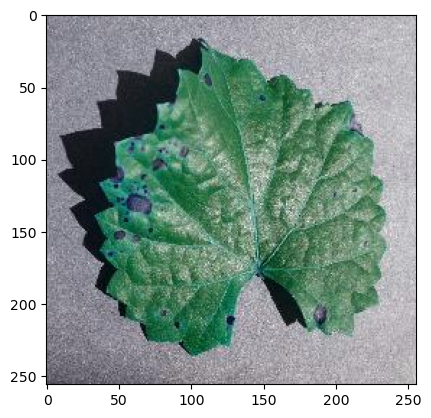

In [57]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Grape Black rot\Grape Black rot\00cff577-afd4-4e36-ac9c-a52aa6ae5949___FAM_B.Rot 0508.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Probabilities: [4.68906001e-05 9.99952316e-01 2.21024909e-09 4.07760363e-20
 3.70859141e-07 4.22045686e-15 2.24580513e-13 3.33431971e-09
 1.06785746e-20 1.78711115e-12 3.28946754e-07 1.59180455e-08
 1.09305598e-12 6.74131044e-08 1.40982612e-14 1.72743817e-17
 2.19947702e-26 5.60147403e-27]
It's Grape Esca


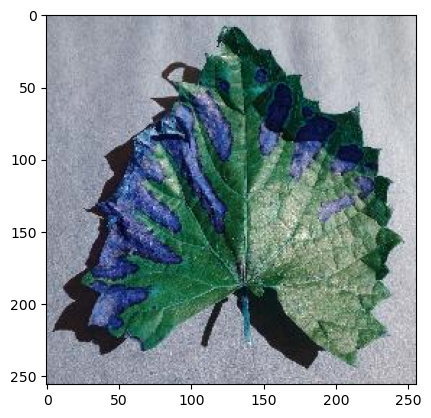

In [26]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Grape Esca\Grape Esca\0c0064e9-f2f4-4264-95a2-58e6e795d1a7___FAM_B.Msls 1328.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Probabilities: [2.52161734e-03 4.28833886e-07 2.27071411e-07 1.92869514e-01
 4.64274287e-02 4.68815267e-01 1.71724741e-06 1.06723211e-03
 2.10585749e-05 8.42319219e-04 7.03962636e-04 2.75817756e-02
 3.04808433e-04 2.58784860e-01 1.10308465e-05 4.61151794e-05
 5.90619777e-07 4.92188451e-12]
Class not confidently detected


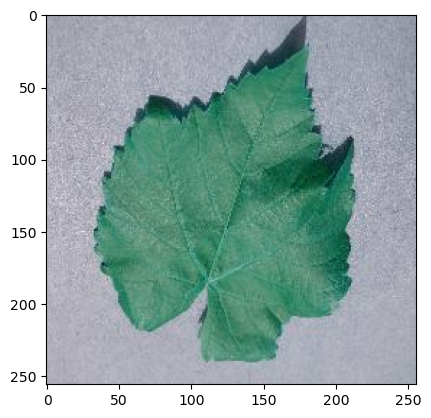

In [55]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Grape healthy\Grape healthy\0cd6cdbd-1674-4abb-b734-756da4994cd0___Mt.N.V_HL 6052.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Probabilities: [2.52271630e-03 4.48479637e-04 9.91365671e-01 9.47015053e-08
 1.07514876e-04 2.35746666e-06 5.26435724e-06 1.97415458e-04
 8.46230239e-11 3.41821520e-04 2.87645473e-03 1.32552651e-03
 5.29076555e-04 2.20600014e-05 2.55464605e-04 1.33031634e-07
 1.80399154e-10 1.32623594e-13]
It's Grape Leaf blight


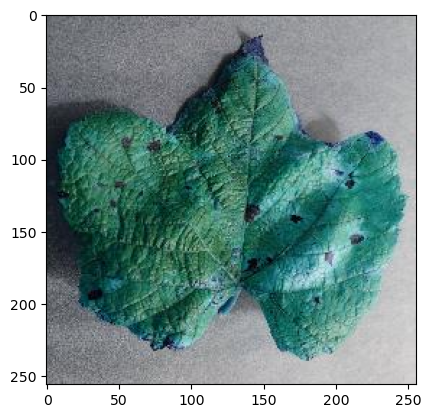

In [34]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Grape Leaf blight\Grape Leaf blight\0b19e488-1361-49b9-a5bc-b47d5bd8207c___FAM_L.Blight 4587.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Probabilities: [3.0731346e-08 5.7711662e-07 1.3233259e-11 1.3988997e-12 9.9943417e-01
 3.0220442e-06 2.0325203e-08 6.4418253e-07 3.9894221e-08 1.7410822e-15
 2.7041200e-05 4.8711337e-04 2.1779947e-08 2.8056252e-07 4.6918805e-05
 9.0474288e-08 7.9918556e-19 5.9127360e-17]
It's Pepper Bacterial spot


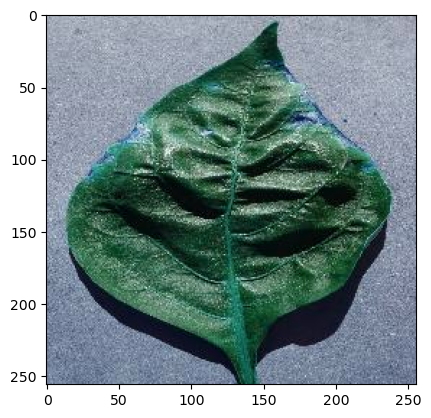

In [35]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Pepper Bacterial spot\Pepper Bacterial spot\1ade72cf-f7e0-4282-92d9-614bf05289a0___NREC_B.Spot 1975.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Probabilities: [2.39375178e-04 4.61499949e-05 9.94802130e-10 7.60403782e-05
 2.68579577e-03 9.81477976e-01 1.10435938e-09 1.64162248e-05
 1.51694007e-02 4.80734119e-09 1.03941304e-04 9.37086661e-05
 1.02113468e-07 5.86617425e-05 2.60286070e-05 3.26633199e-07
 7.94890109e-09 6.01835518e-06]
It's Pepper healthy


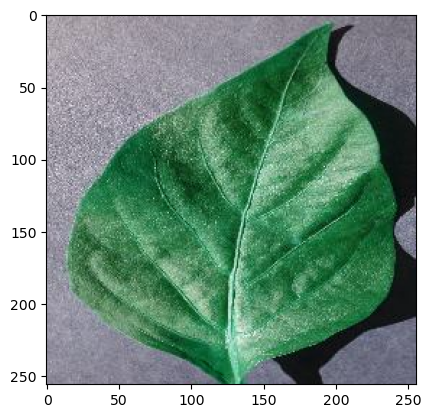

In [36]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Pepper healthy\Pepper healthy\0ba474dd-0cfd-4fd2-a58c-8e3d18dbe7c3___JR_HL 8395.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Probabilities: [2.5571198e-09 9.5816792e-11 2.5972133e-03 1.0712792e-14 1.7297200e-04
 2.0636987e-08 9.9704546e-01 9.8978599e-06 2.0268258e-17 3.4339454e-09
 5.4498174e-05 7.1807284e-05 7.6365310e-11 4.8225735e-05 1.4725413e-10
 1.9897877e-11 3.7446281e-21 3.1735671e-28]
It's Potato Early blight


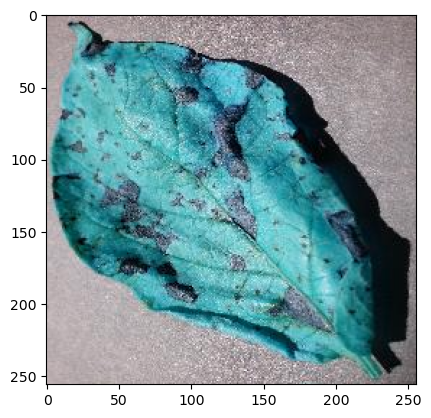

In [37]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Potato Early blight\Potato Early blight\1af20ff8-980d-4912-b337-804b09667de3___RS_Early.B 7392.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Probabilities: [2.73927755e-04 8.70063304e-05 2.56381201e-12 7.07132176e-06
 4.52772081e-01 1.05499625e-02 6.32200825e-09 1.69360638e-03
 4.28840965e-01 3.41242128e-08 1.40759759e-02 2.74156017e-04
 9.36977926e-07 8.95731077e-02 4.28410509e-04 6.00803643e-04
 9.87636195e-10 8.21920403e-04]
Class not confidently detected


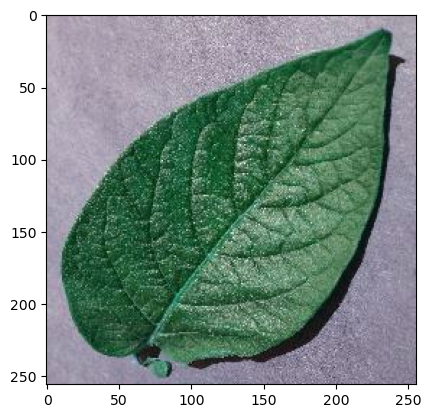

In [56]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Potato healthy\Potato healthy\1a1184f8-c414-4ead-a4c4-41ae78e29a82___RS_HL 1971.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
Probabilities: [1.3503501e-04 2.0289608e-08 1.0570518e-07 4.2109839e-03 9.9398680e-03
 5.8971196e-03 7.3550390e-03 9.3438858e-01 1.6762389e-04 1.4523539e-03
 3.2670686e-03 9.0597989e-03 6.1566720e-07 2.2442099e-02 1.4620532e-05
 1.0854369e-03 5.8366323e-04 8.4155800e-13]
It's Potato Late blight


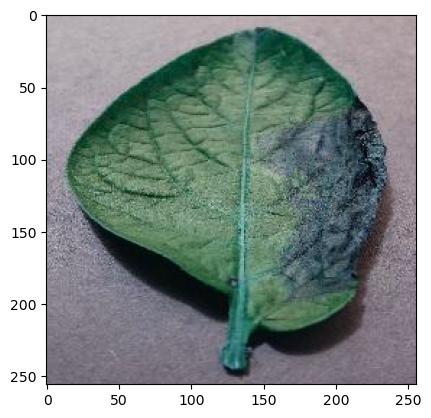

In [39]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Potato Late blight\Potato Late blight\01a8cc9f-074a-4866-87c8-bb5a9e3895b4___RS_LB 2968.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Probabilities: [8.7529691e-03 4.9079314e-04 2.9850152e-04 1.9081970e-08 1.6870755e-06
 5.0178588e-08 7.0167367e-08 1.0313359e-04 2.0706325e-16 7.7518094e-01
 2.1215825e-01 2.3414318e-03 6.3708314e-04 3.4993966e-05 4.5590980e-08
 5.7279635e-08 2.8328243e-11 3.4575755e-18]
It's Tomato Bacterial spot


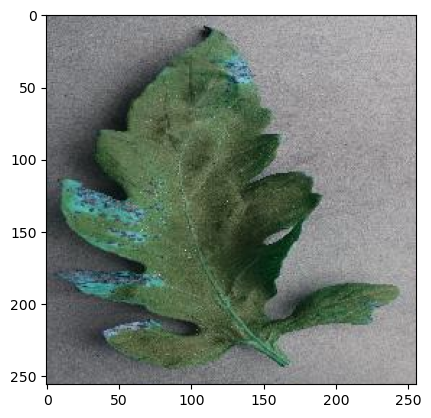

In [40]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Tomato Bacterial spot\Tomato Bacterial spot\0d922399-7ba5-4d12-b84e-bb4b966c58ae___GCREC_Bact.Sp 6307.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Probabilities: [2.0433683e-02 8.4786542e-02 2.0979414e-05 6.0629071e-12 6.8876452e-06
 5.7086530e-10 1.1179773e-09 4.8618626e-06 1.2792736e-20 2.6635502e-03
 8.9198959e-01 1.8234379e-05 1.1255320e-05 6.4441680e-05 6.6932068e-12
 4.1843976e-12 4.5934962e-16 6.1882403e-21]
It's Tomato Early blight


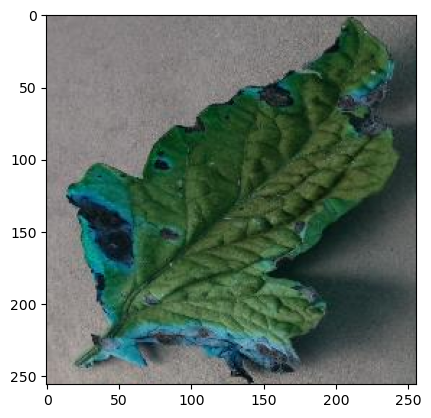

In [41]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Tomato Early blight\Tomato Early blight\0ecc2ee7-fb66-41fa-a23b-9bdeaf31078a___RS_Erly.B 6381.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Probabilities: [2.93646862e-09 9.40602831e-08 2.91231821e-08 7.28182101e-08
 5.64419123e-10 2.11486798e-02 2.84208613e-06 3.59551523e-05
 1.18152048e-12 1.11128365e-07 4.12017130e-07 4.09299284e-02
 1.09812993e-06 8.35662922e-06 4.15507229e-09 3.59674929e-11
 9.37872469e-01 4.38715383e-11]
It's Tomato healthy


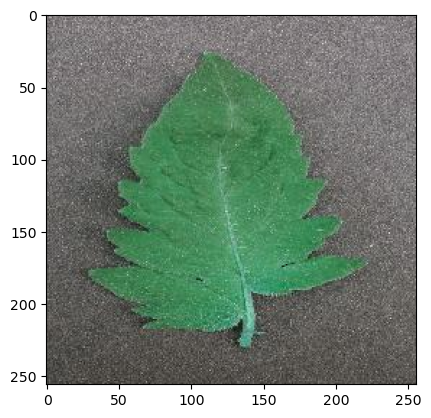

In [42]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Tomato healthy\Tomato healthy\1b966d62-d5c3-4a67-ba36-b67d873ccfdf___GH_HL Leaf 440.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Probabilities: [2.5277392e-03 2.0271536e-05 2.0024484e-06 1.4896282e-08 4.9219448e-02
 1.6816992e-01 2.9471542e-07 3.3707989e-03 2.6035757e-06 3.5686324e-07
 1.3940589e-02 4.9596000e-01 2.1818379e-02 5.9751151e-03 2.3823252e-01
 7.6000358e-04 2.1390924e-11 1.4068924e-10]
Class not confidently detected


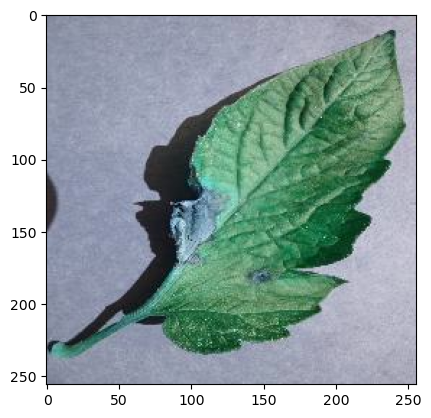

In [43]:

model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Tomato Late blight\Tomato Late blight\00ce4c63-9913-4b16-898c-29f99acf0dc3___RS_Late.B 4982.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Probabilities: [4.5287400e-03 3.3489294e-05 3.9260876e-06 2.6920845e-05 9.4973333e-02
 3.8767664e-04 1.4320844e-03 7.5009274e-01 1.0468069e-03 1.4153757e-04
 4.5418616e-02 1.1505887e-02 3.1133409e-06 2.7700337e-03 2.6845627e-02
 6.0789134e-02 3.6556841e-07 3.7375977e-10]
It's Potato Late blight


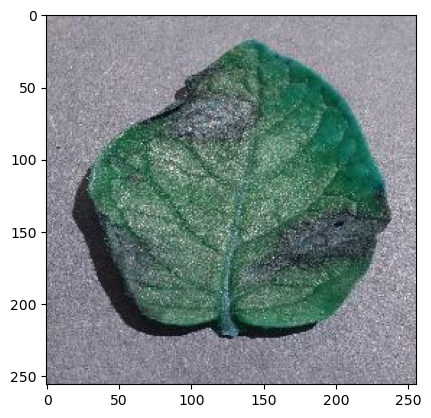

In [44]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Test data\Potato Late blight\0c83302d-4233-4e98-8ecf-755a970495bb___RS_LB 4904.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Probabilities: [1.5694529e-03 6.0959514e-06 9.2627281e-01 2.9236562e-08 1.4954481e-02
 1.4948822e-04 5.4737666e-05 4.8668603e-06 1.2414635e-15 2.2876331e-04
 2.0802883e-02 4.1988766e-05 4.3143312e-04 3.5480633e-02 2.3075879e-06
 1.6169077e-08 2.9528874e-16 2.8976518e-16]
It's Grape Leaf blight


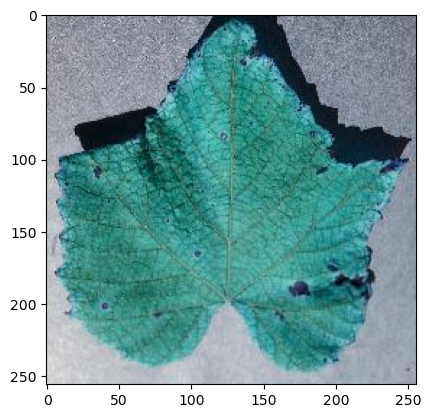

In [45]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Test data\Grape Leaf blight\0cd3c290-1fe0-47e1-a2a4-ad8566fb7147___FAM_L.Blight 1714.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
Probabilities: [4.50897153e-10 1.03753273e-11 1.49614732e-09 1.64338443e-09
 9.42682347e-13 1.04395895e-06 9.69855876e-08 7.58732640e-05
 3.27958147e-13 3.49755501e-05 4.07750605e-07 1.03235754e-04
 8.39169019e-08 9.22348065e-09 4.30656939e-07 1.00648812e-07
 9.99783695e-01 3.35596825e-15]
It's Tomato healthy


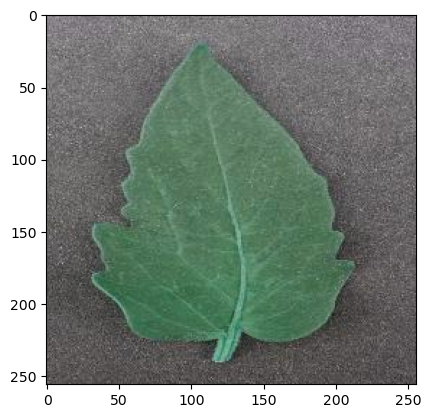

In [46]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Test data\Tomato healthy\0f809e80-ee2b-4ad4-9a80-50d789298d48___GH_HL Leaf 192.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Probabilities: [1.1069597e-03 9.9235135e-01 2.4844474e-06 1.4454204e-14 4.0738187e-06
 7.6852150e-11 1.2628344e-09 2.5513473e-06 2.1414011e-15 2.4409703e-08
 5.5032237e-03 1.0269483e-03 2.8770607e-08 1.3365673e-06 1.0075929e-06
 3.9916515e-09 2.7309128e-15 1.2384559e-21]
It's Grape Esca


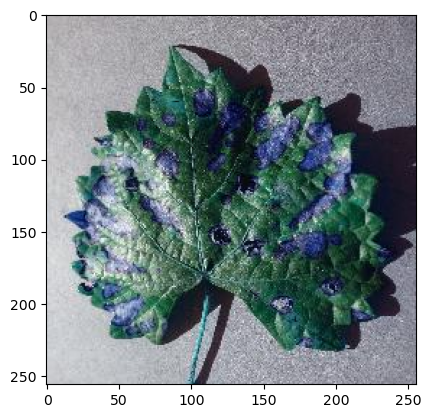

In [47]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Test data\Grape Esca\0b924439-fc64-42d3-9bf3-74a593a30b2b___FAM_B.Msls 3873.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Probabilities: [2.7071675e-11 1.9963108e-08 7.4302049e-12 1.6080221e-13 5.1022280e-04
 9.0010817e-09 5.6742807e-05 9.1042480e-09 2.6591311e-17 1.9572082e-09
 9.9053514e-06 2.0594180e-03 8.8982874e-01 1.0753444e-01 3.1349657e-07
 1.6123914e-07 1.0632875e-10 1.8481341e-09]
It's Tomato Leaf Mold


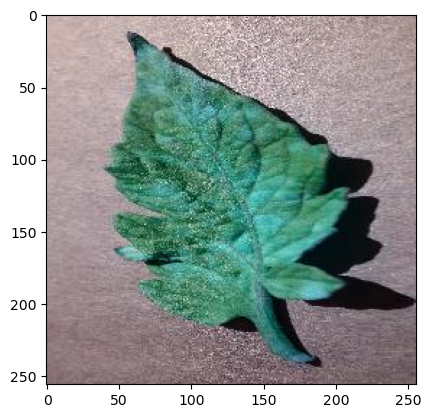

In [48]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Tomato Leaf Mold\Tomato Leaf Mold\0de02a32-f166-4d67-bbb8-689e96d04c44___Crnl_L.Mold 8811.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Probabilities: [7.9142028e-06 2.6684990e-08 4.5322097e-12 6.9630573e-08 7.2761317e-04
 7.0409046e-04 2.3057148e-11 2.9225794e-05 4.4426342e-04 1.1525865e-05
 3.3176087e-03 1.3055404e-04 9.4684586e-03 2.2575603e-01 1.4816858e-01
 1.3873049e-02 1.6388423e-08 5.9736103e-01]
It's Tomato mosaic virus


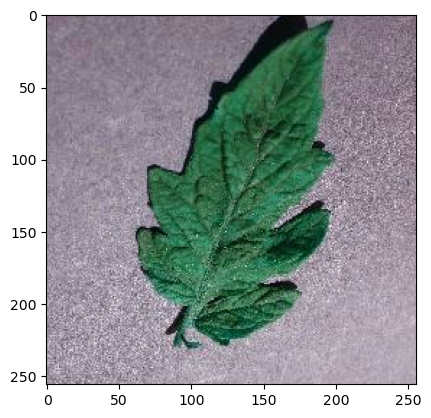

In [49]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Tomato mosaic virus\Tomato mosaic virus\0c779116-043c-4715-b080-16be2e8d2552___PSU_CG 2285.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Probabilities: [8.7305613e-02 3.7363499e-02 4.0563642e-05 1.1568235e-07 2.4092175e-02
 1.6870347e-07 9.3434993e-10 1.9893520e-04 1.8871499e-10 7.2063017e-04
 6.7981123e-03 1.5588610e-04 1.8736440e-03 8.4144706e-01 1.7535637e-06
 1.7291321e-06 2.8900718e-15 1.0831508e-11]
It's Tomato Septoria leaf spot


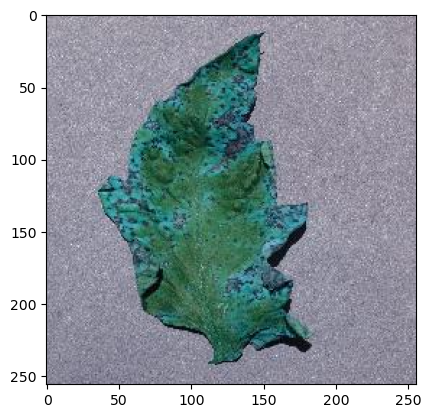

In [50]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Tomato Septoria leaf spot\Tomato Septoria leaf spot\0a68a294-30d1-4422-ab7e-a1909ec277f7___JR_Sept.L.S 8443.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
Probabilities: [3.9621012e-04 1.6264951e-04 3.3128515e-06 5.9360119e-08 1.0784019e-02
 1.3916333e-04 1.1602511e-05 3.3378448e-02 9.3390490e-06 1.0677035e-06
 9.9351205e-02 8.9665309e-02 3.6201274e-04 2.6284268e-03 7.5473690e-01
 8.3701201e-03 1.6045606e-08 5.8348494e-08]
It's Tomato Spider mites


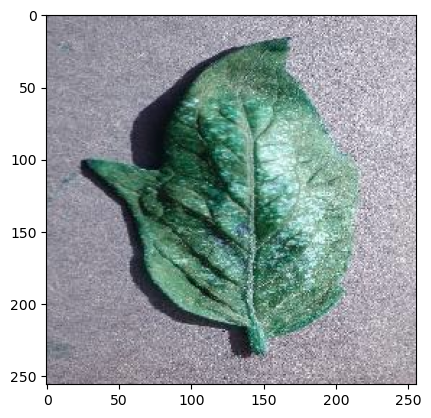

In [51]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Tomato Spider mites\Tomato Spider mites\0a714292-45d6-483a-bbd0-2eab8fe72888___Com.G_SpM_FL 1496.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Probabilities: [9.1375148e-07 1.1685991e-06 7.6343332e-10 1.4068424e-08 4.0295490e-05
 1.3998398e-05 3.1621959e-05 1.2515239e-02 3.9893508e-05 7.9598101e-07
 1.5786581e-02 6.8136456e-04 1.1044554e-05 6.7408342e-04 2.9026160e-01
 6.7823297e-01 1.7063153e-03 2.0664083e-06]
It's Tomato Target Spot


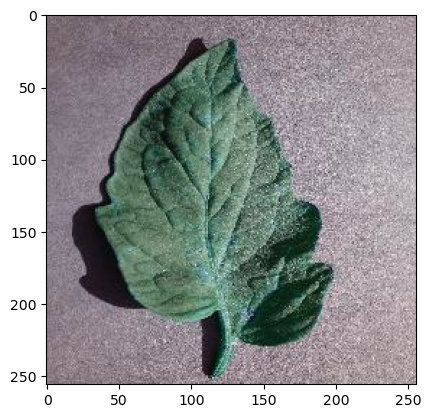

In [52]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Train data\Tomato Target Spot\Tomato Target Spot\0a578317-a98b-4e26-b17b-cd2930330375___Com.G_TgS_FL 0785.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Probabilities: [3.7963726e-08 4.5570658e-07 8.2833303e-06 5.3466511e-12 2.3181357e-03
 1.4794598e-07 9.8967093e-01 3.1829672e-04 1.4465822e-09 1.5915523e-10
 3.6689994e-04 4.7848685e-04 4.1685450e-08 6.8383049e-03 1.4014687e-09
 5.3820912e-09 6.7488007e-13 7.3489703e-17]
It's Potato Early blight


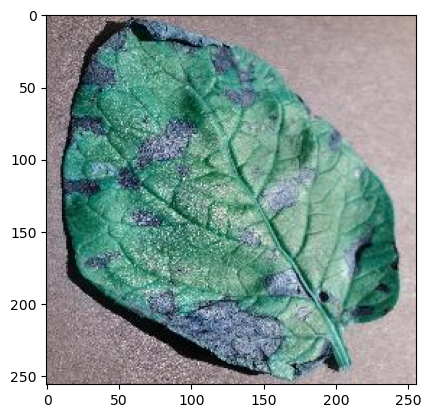

In [53]:
model_output(r"C:\Users\sunny1\Desktop\Cp2\Project\Leaves dataset\Test data\Potato Early blight\0a6983a5-895e-4e68-9edb-88adf79211e9___RS_Early.B 9072.JPG")

### Part 5 - model

In [58]:
import pickle
pickle.dump(model, open('graphs_classifier.pkl','wb'))   # Exporting model from python to laptop